In [7]:
#using VADER to calculate sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import re

In [8]:
#loading data
headlines = pd.read_csv('FiQA_train_ABSA_financial_headlines.tsv',delimiter='\t',header=0)
posts = pd.read_csv('FiQA_train_ABSA_financial_posts.tsv',delimiter='\t',header=0)
posts = posts.drop(['Unnamed: 0', 'id'],axis=1)
headlines = headlines.drop(['Unnamed: 0', 'id'],axis=1)
posts_text = posts.iloc[:,:1]
posts_score = posts.iloc[:,1:]
headlines_text = headlines.iloc[:,:1]
headlines_score = headlines.iloc[:,1:]
text_frames = [posts_text,headlines_text]
score_frames = [posts_score,headlines_score]
text = pd.concat(text_frames)
score = pd.concat(score_frames)

In [9]:
sentences = []
intensity = []
for sent in text.values.tolist():
    sentences.append(sent[0])
for scr in score.values.tolist():
    intensity.append(scr[0])

In [10]:
def clean_sentences(sentence):
    sentence = re.sub(r'(\W)\1{2,}', r'\1', sentence) #remove multiple repeat non num-aplha char !!!!!!!!!-->!
    sentence = re.sub(r'(\w)\1{2,}', r'\1\1', sentence)#removes alpha char repeating more than twice aaaa->aa
    sentence = re.sub(r'(?P<url>https?://[^\s]+)', r'', sentence)#removes links
#     sentence = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",sentence).split()) 
    sentence = re.sub(r"(?:\@|https?\://)\S+", "", sentence)# remove @usernames
    sentence = sentence.replace('#','')#remove # from #tags
    return sentence

In [11]:
for i in range(len(sentences)):
    sentences[i] = clean_sentences(sentences[i])
sentences

['$ZSL looking very weak, could be a good short setup.',
 '$ZNGA  Looking for a test at 9.25 resistance point. cc @ cfrazierjr  traders',
 '$ZNGA did they prerelease sh*tty earnings or something',
 'ContrarianAlert: Why Zynga Failed -  $ZNGA',
 '  $ZNGA shorts are getting nervous""',
 '$ZNGA it\'s the times when you start to wonder "do i have enough shares ? this beast keeps moving.."',
 '$EA points to the two Facebook games and accuses $ZNGA of copyright infringement. ',
 "Following this morning's EPS, I blew out $ZMH and added to $DNKN (longs)",
 " No worries, I always said there`d be sucker rallies on $ZIOP 's down trend, congrats.",
 "$ZC_F One thing you can't short here is $DBA food. Its barely getting warm in chicago, and it looks like drought conditions in soil already",
 '$ZAGG getting ready.Target $15 plus on a close over $13.50 on better than avg daily Volume ',
 '$YUM OPPY reduces its price target on Yum Brands (YUM) to $74 from $82 after factoring in the troubles the compan

In [12]:
analyser = SentimentIntensityAnalyzer()

In [13]:
prediction=[]
for sent in sentences:
    prediction.append(analyser.polarity_scores(sent)['compound'])
    

In [14]:
len(intensity)

3789

In [17]:
#calculating error
error = []
for n,m in zip(intensity,prediction):
    error.append((max(n,m)-min(n,m))*100/2)

In [18]:
print("mean of error  "+str(sum(error)/len(error)))
print("max "+ str(max(error)))
print("min "+ str(min(error)))

mean of error  17.489635787806854
max 77.24
min 0.0


Populating the interactive namespace from numpy and matplotlib


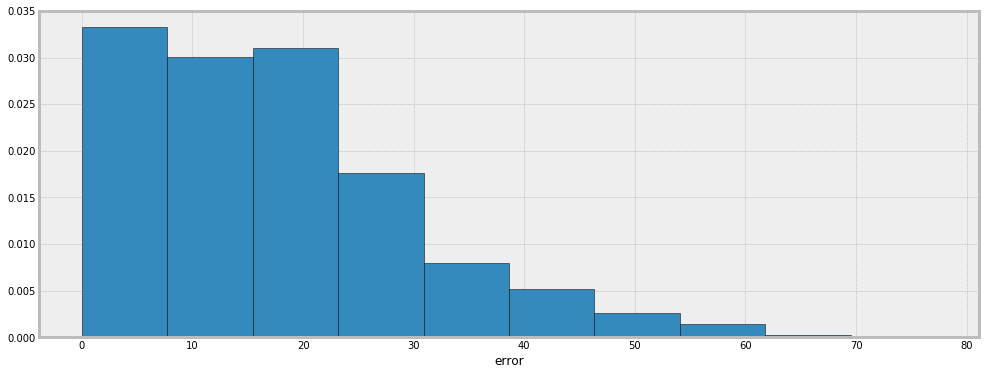

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%pylab inline
plt.style.use('bmh')
pylab.rcParams['figure.figsize'] = (15, 6)
plt.hist(error, normed=True,edgecolor='black')
plt.xlabel('error');